#### Handwritten Digits Recognition using OpenCV kNN

Solution Workflow: -
* Read source image as Gray image buffer
* Prepare train, test & their labels data
* Feed train data into OpenCV kNN model
* Decide appropriate value of k
* Predict for each test sample as which cluster it belongs to, i.e., which digit
* Calculate accuracy

Context: -
* K-nearest neighbor (k-NN) classification is **conventional** non-parametric classifier
* knn.train does not involve real supervised training, rather it just populates training data into desired data structure, i.e., ZERO training time
* Euclidean is the default distance which is suitable for abstract numerical features like image clustering; Refer to https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4978658/ for various distance options. Note that this use case involves Euclidean distance between 400x1 vectors!
* k must be decided through Cross Validation, but OpenCV does not support critical ML concepts such as Pipeline, Cross Validation, Hyperparameters Optimization, etc.
* Though OpenCV kNN can be fed into SKLearn if OpenCV has some indispensible estimators which are not available in SKLearn - refer to http://www.askaswiss.com/2017/11/how-to-integrate-essential-scikit-learn-functions-with-opencv.html.
* Other options of clustering are Mean Shift, Expectation Maximization with Gaussian Mixture Models, DBSCAN, etc.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

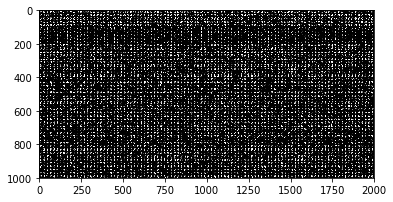

In [2]:
# Source image digits.png is actually 8-bit Gray
imgGRAY = cv2.imread('opencv_kNN_OCR_digits.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(imgGRAY[..., :], cmap = 'gray')
plt.show()

In [3]:
# 50x100 images (cells) - each cell is 20x20 image
cells = [np.hsplit(row, 100) for row in np.vsplit(imgGRAY, 50)]

# x is 4-d (50,100,20,20)
x = np.array(cells)
x.shape

(50, 100, 20, 20)

In [4]:
# Each 20x020 cell, i.e., image flattened into a single row (rowlen is 400)
# All images stacked into a single column
# train & test are each 2500 & 2500 images
train = x[:, :50].reshape(-1, 400).astype(np.float32) # Size = (2500,400)
test = x[:, 50:100].reshape(-1, 400).astype(np.float32) # Size = (2500,400)

(train.shape, test.shape)

((2500, 400), (2500, 400))

In [5]:
# Labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:, np.newaxis]
test_labels = train_labels.copy()

(train_labels.shape, test_labels.shape)

((2500, 1), (2500, 1))

In [6]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

ret, results, neighbours, dist = knn.findNearest(test, k=5)

matches = results==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/results.size
print(accuracy)

91.76
